# Source Estimation of EEG/MEG Data
### Olaf Hauk, MRC Cognition and Brain Scienes Unit, University of Cambridge
### 25.1.2021


The following script was created for demo purposes only. Some bits are simplified, and some parameters were chosen to make effects easily visible. They may not be optimal for a real data set.
For more EEG/MEG tutorials in MNE-Python, see e.g. https://martinos.org/mne/stable/auto_tutorials/.
The script requires MNE-Python V0.22 and access to data on the CBU computing cluster. It can be modified to use the MEG datasets 'sample' and 'somato' (below).

# (MNE-)Python preparation

In [1]:
# set paths
import sys

# figures within notebook
%matplotlib inline

# to keep copy of raw data
from copy import deepcopy

# for plotting
from matplotlib import pyplot as plt

# import numpy package
import numpy as np

# import MNE-Python tools
import mne

# MNE dataset 'Sample'
subjects_dir = '/imaging/olaf/Workshop/MNE-sample-data/subjects'
meg_dir = '/imaging/olaf/Workshop/MNE-sample-data/MEG/sample/'

# check MNE-Python version
print('MNE-Python version: %s.' % mne.__version__)

MNE-Python version: 0.22.0.


Using surface: /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/bem/inner_skull.surf
Using surface: /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/bem/outer_skull.surf
Using surface: /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/bem/outer_skin.surf
Using surface: /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/bem/inner_skull.surf
Using surface: /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/bem/outer_skull.surf
Using surface: /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/bem/outer_skin.surf


/imaging/local/software/miniconda/envs/mne0.22/lib/python3.8/site-packages/mne/viz/utils.py:109: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


Using surface: /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/bem/inner_skull.surf
Using surface: /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/bem/outer_skull.surf
Using surface: /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/bem/outer_skin.surf


/imaging/local/software/miniconda/envs/mne0.22/lib/python3.8/site-packages/mne/viz/utils.py:109: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/imaging/local/software/miniconda/envs/mne0.22/lib/python3.8/site-packages/mne/viz/utils.py:109: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


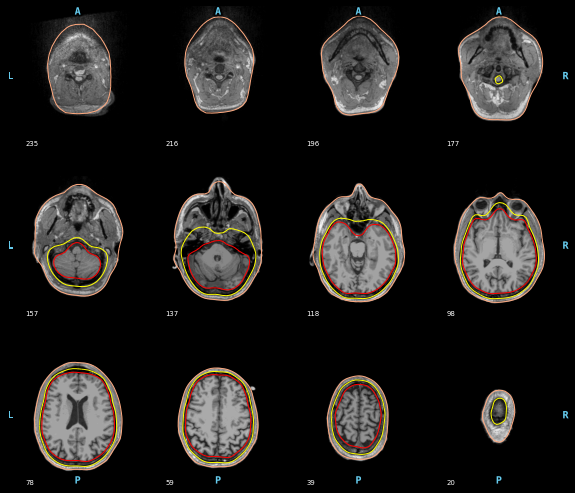

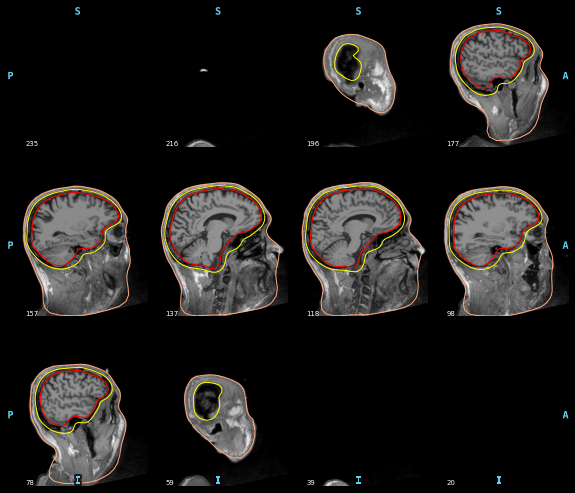

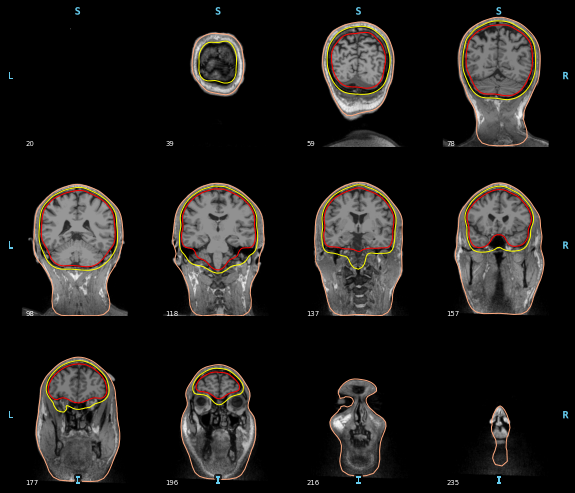

In [2]:
# Plot Boundary Element Model (BEM) surfaces
from mne.viz import plot_bem

fig = plot_bem(subject='sample', subjects_dir=subjects_dir, orientation='axial')
fig = plot_bem(subject='sample', subjects_dir=subjects_dir, orientation='sagittal')
fig = plot_bem(subject='sample', subjects_dir=subjects_dir, orientation='coronal')

# Boundary Element Model (BEM)

In [3]:
# Note: Only one conductivity, i.e. only one compartment for MEG
model = mne.make_bem_model(subject='sample', ico=4,
                                conductivity=(0.3,),
                                subjects_dir=subjects_dir)
bem = mne.make_bem_solution(model)
# mne.bem.write_bem_solution('./sample-bem.fif', bem, overwrite=True)

Creating the BEM geometry...
Going from 4th to 4th subdivision of an icosahedron (n_tri: 5120 -> 5120)
inner skull CM is   0.67 -10.01  44.26 mm
Surfaces passed the basic topology checks.
Complete.

Approximation method : Linear collocation

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
    Inverting the coefficient matrix...
Solution ready.
BEM geometry computations complete.


# Prepare Source Space (cortex)

In [4]:
# The "oct" option determines the spatial sampling of the cortical surface
src = mne.setup_source_space('sample', spacing='oct6',
                             subjects_dir=subjects_dir,
                             add_dist=False)
# mne.write_source_spaces('./sample-src.fif', src, overwrite=True)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /imaging/olaf/Workshop/MNE-sample-data/subjects
Subject      = sample
Surface      = white
Octahedron subdivision grade 6

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/surf/lh.white...
Mapping lh sample -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/155407 selected to source space (oct = 6)

Loading /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/surf/rh.white...
Mapping rh sample -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 4098/156866 selected to 

# Forward Solution ("leadfield")

In [5]:
# Read evoked data
evoked = mne.read_evokeds(meg_dir + 'sample_audvis-ave.fif', baseline=(-0.2, 0.))

Reading /imaging/olaf/Workshop/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline cor

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


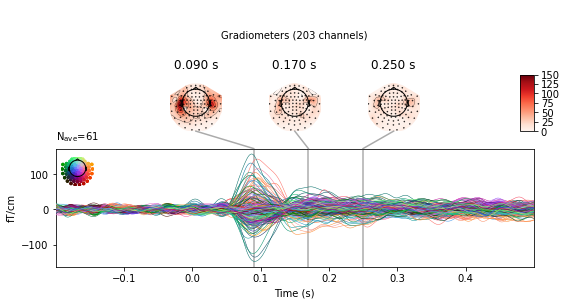

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


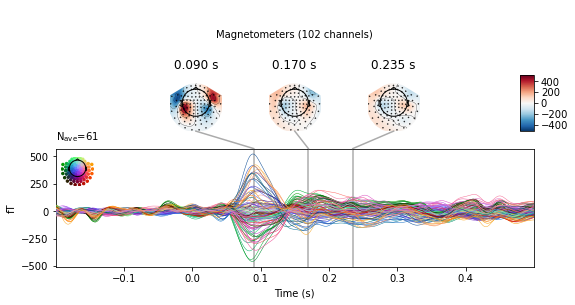

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


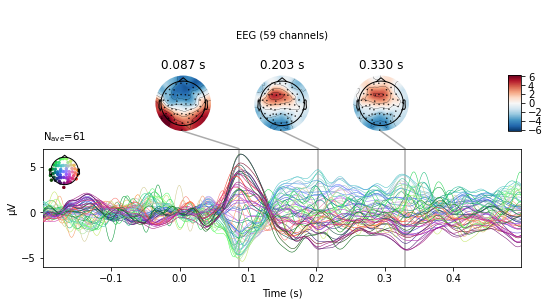

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


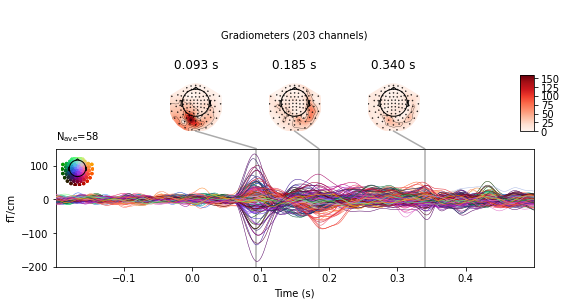

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


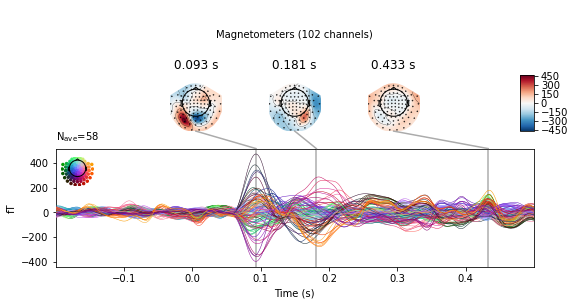

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


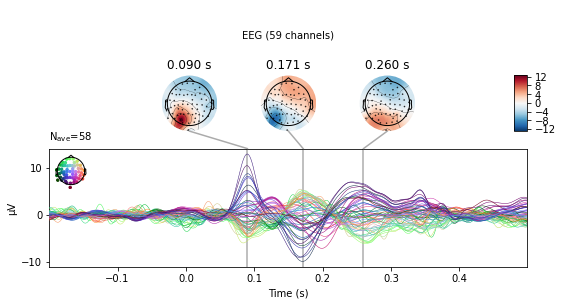

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [6]:
# quickly check whether evoked data look alright
# Right Auditory
evoked[1].plot_joint()
# Right Visual
evoked[3].plot_joint()

In [7]:
fwd = mne.make_forward_solution(evoked[0].info, trans=meg_dir + 'sample_audvis_raw-trans.fif', src=src, bem=bem,
                                meg=True, eeg=False, mindist=5.0)
# mne.write_forward_solution(fname='./sample-fwd.fif', fwd=fwd, overwrite=True)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=155407, n_used=4098>, <surface (rh), n_vertices=156866, n_used=4098>] MRI (surface RAS) coords, subject 'sample', ~24.1 MB>
MRI -> head transform : /imaging/olaf/Workshop/MNE-sample-data/MEG/sample/sample_audvis_raw-trans.fif
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999310  0.009985 -0.035787      -3.17 mm
     0.012759  0.812405  0.582954       6.86 mm
     0.034894 -0.583008  0.811716      28.88 mm
     0.000000  0.000000  0.000000       1.00

Read 306 MEG channels from info
99 coil definitions read
Coordinate transformation: MEG device -> head
     0.991420 -0.039936 -0.124467      -6.13 mm
     0.060661  0.984012  0.167456       0.06 mm
     0.115790 -0.173570  0

# Create Inverse Operator

In [8]:
# Read the forward solution ("leadfield")
# fwd = mne.read_forward_solution(./sample-fwd.fif')

In [9]:
# Read noise covariance matrix
noise_cov = mne.read_cov(meg_dir + 'sample_audvis-shrunk-cov.fif')

    365 x 365 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 59) active


In [10]:
# Regularise noise covariance matrix (can be done fancier, but takes more time)
noise_cov = mne.cov.regularize(noise_cov, evoked[0].info, mag=0.2, grad=0.2, rank='info')

Computing rank from covariance with rank='info'
    MEG: rank 302 after 3 projectors applied to 305 channels
    EEG: rank 58 after 1 projector applied to 59 channels
8 projection items activated
    MAG regularization : 0.2
    Created an SSP operator (subspace dimension = 3)
Computing rank from covariance with rank={'meg': 302, 'eeg': 58}
    Using tolerance 2.8e-14 (2.2e-16 eps * 102 dim * 1.2  max singular value)
    Estimated rank (mag): 99
    MAG: rank 99 computed from 102 data channels with 3 projectors
    Setting small MAG eigenvalues to zero (without PCA)
    GRAD regularization : 0.2
Computing rank from covariance with rank={'meg': 302, 'eeg': 58, 'mag': 99}
    Using tolerance 1.9e-13 (2.2e-16 eps * 203 dim * 4.2  max singular value)
    Estimated rank (grad): 203
    GRAD: rank 203 computed from 203 data channels with 0 projectors
    Setting small GRAD eigenvalues to zero (without PCA)
    EEG regularization : 0.1
    Created an SSP operator (subspace dimension = 1)
Comp

In [11]:
# Create the inverse operator
invop = mne.minimum_norm.make_inverse_operator(evoked[0].info, fwd, noise_cov, loose=0.2, depth=None, rank='info')

Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
info["bads"] and noise_cov["bads"] do not match, excluding bad channels from both
Computing inverse operator with 305 channels.
    305 out of 306 channels remain after picking
Selected 305 channels
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 3)
Computing rank from covariance with rank='info'
    MEG: rank 302 after 3 projectors applied to 305 channels
    Setting small MEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.
    largest singular value = 4.78069
    scaling factor to adjust the trace = 6.99172e+19


In [12]:
stc = {}

# Compute source estimate for Left Auditory
stc['LA'] = mne.minimum_norm.apply_inverse(evoked=evoked[0], inverse_operator=invop, lambda2=1./9., method='MNE')

# Right Auditory
stc['RA'] = mne.minimum_norm.apply_inverse(evoked=evoked[1], inverse_operator=invop, lambda2=1./9., method='MNE')

# Left Visual
stc['LV'] = mne.minimum_norm.apply_inverse(evoked=evoked[2], inverse_operator=invop, lambda2=1./9., method='MNE')

# Right Visual
stc['RV'] = mne.minimum_norm.apply_inverse(evoked=evoked[3], inverse_operator=invop, lambda2=1./9., method='MNE')

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 55
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
Applying inverse operator to "Left Auditory"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  68.0% variance
    Combining the current components...
[done]
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 61
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
Applying inverse operator to "Right Auditory"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ..

In [26]:
# Plot source estimate on cortical surface
stc['RA'].plot(subjects_dir=subjects_dir, subject='sample', clim=dict(kind='value',
         pos_lims=(0., 3.8e-10, 7.6e-10)), time_viewer=True, initial_time=0.09,
         hemi='both')

In [24]:
# get maximum amplitude for scaling if necessary
stc['RA'].data.max()

7.645172044420722e-10

# Point-Spread and Cross-Talk Functions (PSFs/CTFs)

In [18]:
from mne.minimum_norm import (make_inverse_resolution_matrix, get_point_spread, get_cross_talk)

In [32]:
# Compute resolution matrices for MNE
forward = mne.read_forward_solution(meg_dir + 'sample_audvis-meg-oct-6-fwd.fif')
# Convert forward solution to fixed source orientations
mne.convert_forward_solution(forward, surf_ori=True,
                             force_fixed=True, copy=False)
# Read inverse operator with fixed orientation constraint
inverse_operator = mne.minimum_norm.read_inverse_operator(
    meg_dir + 'sample_audvis-meg-oct-6-meg-nodepth-fixed-inv.fif')

# Compute resolution matrix for MNE
rm_mne = make_inverse_resolution_matrix(forward, inverse_operator,
                                        method='MNE', lambda2=1. / 3.**2)
# Source space
src = inverse_operator['src']

Reading forward solution from /imaging/olaf/Workshop/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (7498 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Reading inverse operator decomposition from /imaging/olaf/Workshop/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-nodepth-fixed-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse o

In [33]:
# find vertex with maximum source strength at time index 174 (90ms)
sources = [stc['RA'].data[:, 174].argmax()]

(7498, 7498)

In [34]:
# Compute PSF and CTF
stc_psf = get_point_spread(rm_mne, forward['src'], sources, norm=True)

stc_ctf = get_cross_talk(rm_mne, forward['src'], sources, norm=True)

In [37]:
# Plot PSF and CTF
# PSF and CTF are the same for MNE
# The maxima are around the target location - i.e. we have good spatial resolution at that location
stc_psf.plot('sample', 'inflated', 'both', subjects_dir=subjects_dir)

stc_ctf.plot('sample', 'inflated', 'both', subjects_dir=subjects_dir)

Using control points [0.11873028 0.18337462 0.74726831]
Using control points [0.09880411 0.15539794 0.66043122]
